In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#Census Tract b25075 Housing value
#Census Tract B15003 Education level

In [68]:
#Taking census tract education data B15003 and merging them so it contains years 2019 - 2023 for Multnomah County
#Manually added years and cleaned csv's in excel. Did the same before with house value csv's.

def combine_csv_files(input_files, output_file):
    # Read and combine all CSV files
    combined_df = pd.concat([pd.read_csv(file) for file in input_files], ignore_index=True)
    
    # Save to output file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined CSV saved as {output_file}")

education_csv_files = ["Multnomah_Education2019.csv","Multnomah_Education2020.csv",\
                  "Multnomah_Education2021.csv","Multnomah_Education2022.csv",\
                    "Multnomah_Education2023.csv"]

combine_csv_files(education_csv_files,"education_level_combined.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Multnomah_Education2019.csv'

In [48]:
# Load the two datasets
house_data = pd.read_csv("house_value_simplified.csv")
education_data = pd.read_csv("education_level_simplified.csv")

# Merge the two datasets on 'Census tract' and 'year' columns
merged_data = pd.merge(house_data, education_data, on=['Census Tract', 'Year'], how='inner')

# Save the merged dataset to a new CSV file
#merged_data.to_csv('merged_data.csv', index=False) # only needs to be done once

print(merged_data.head())

                                  Census Tract  Year  House Total  Under 50K  \
0     Census Tract 1, Multnomah County, Oregon  2019         1879          0   
1     Census Tract 2, Multnomah County, Oregon  2019         1325          0   
2  Census Tract 3.01, Multnomah County, Oregon  2019          847          0   
3  Census Tract 3.02, Multnomah County, Oregon  2019         2424          0   
4  Census Tract 4.01, Multnomah County, Oregon  2019         1135          8   

   50K-100K  100K-250K  250K-500K  500K-1M  1M-1.5M  1.5M-2M  2M+  \
0        53        111        676      903      121       15    0   
1         0         13        569      728       15        0    0   
2         0         21        297      512       17        0    0   
3        28         36        706     1558       57        0   39   
4        29         40        743      315        0        0    0   

  Education Total  No Formal Education  Elementary School  Middle School  \
0           5,117           

In [49]:
###########################################
# USED FOR CREATING AND CLEANING DATASETS #
###########################################
merged_data_p = pd.read_csv("merged_data_proportions.csv")

#Converting the dataframes types to floats except the first column
for col in merged_data_p.columns:
    if col != "Census Tract":
        merged_data_p[col] = pd.to_numeric(merged_data_p[col], errors="coerce").fillna(0).astype(float)

#merged_data_p.to_csv('merged_data_proportions_copy.csv', index=False) #Just for addign the dataset to folder !don't run again
#print(merged_data_p.head()) #Data validation test
#print(merged_data_p.dtypes)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# The 4 columns to exclude in scaling
exclude_cols = ["Census Tract", "Year", "Education Total", "House Total"]

# Select only columns to scale
cols_to_scale = merged_data_p.columns.difference(exclude_cols)

# Apply scaling
house_edu_scaled = merged_data_p.copy()
house_edu_scaled[cols_to_scale] = scaler.fit_transform(merged_data_p[cols_to_scale])

house_edu_scaled.to_csv('house_edu_norm.csv', index=False)

# Display sample
print(house_edu_scaled.head())

print(merged_data_p.drop(columns="Census Tract").groupby("Year").mean())


                                  Census Tract    Year  House Total  \
0     Census Tract 1, Multnomah County, Oregon  2019.0       1879.0   
1     Census Tract 2, Multnomah County, Oregon  2019.0       1325.0   
2  Census Tract 3.01, Multnomah County, Oregon  2019.0        847.0   
3  Census Tract 3.02, Multnomah County, Oregon  2019.0       2424.0   
4  Census Tract 4.01, Multnomah County, Oregon  2019.0       1135.0   

   Under 50K  50K-100K  100K-250K  250K-500K   500K-1M   1M-1.5M   1.5M-2M  \
0   0.000000  0.154977   0.059074   0.359766  0.480575  0.147347  0.042565   
1   0.000000  0.000000   0.009811   0.429434  0.549434  0.025903  0.000000   
2   0.000000  0.000000   0.024793   0.350649  0.604486  0.045925  0.000000   
3   0.000000  0.063466   0.014851   0.291254  0.642739  0.053805  0.000000   
4   0.019758  0.140385   0.035242   0.654626  0.277533  0.000000  0.000000   

        2M+  Education Total  No Formal Education  Elementary School  \
0  0.000000           5117.0    

<Figure size 1000x500 with 0 Axes>

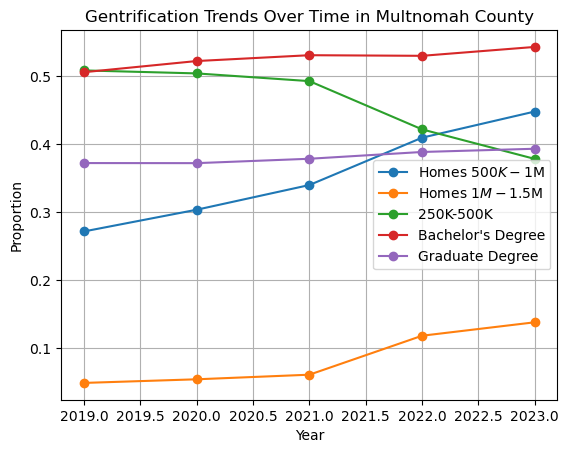

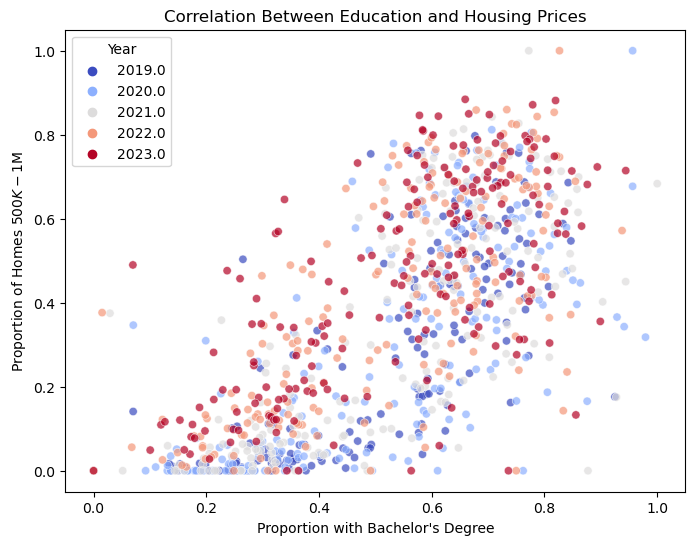

In [50]:

# === 1. Line Graph: Trends Over Time for Housing and Education ===
plt.figure(figsize=(10, 5))
house_edu_scaled.groupby("Year")[["500K-1M", "1M-1.5M","250K-500K", "Bachelor's degree", "Graduate Degree"]].mean().plot(marker="o")
plt.title("Gentrification Trends Over Time in Multnomah County")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(["Homes $500K-$1M", "Homes $1M-$1.5M","250K-500K", "Bachelor's Degree", "Graduate Degree"])
plt.grid()
plt.show()

# === 2. Scatter Plot: Education Levels vs. Housing Values ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=house_edu_scaled, x="Bachelor's degree", y="500K-1M", hue=house_edu_scaled["Year"], palette="coolwarm", alpha=0.7)
plt.xlabel("Proportion with Bachelor's Degree")
plt.ylabel("Proportion of Homes $500K-$1M")
plt.title("Correlation Between Education and Housing Prices")
plt.show()

## Statistical Analysis

### **Part 1: Relationship between Education Level and House Price**

In this section we seek to determine if there exists any relationship between education level and house price.

In [10]:
from scipy.stats import pearsonr, spearmanr
from scipy.spatial import distance

### Pearson's Correlation

To detect linear relationship

1. Correlation Values (Pearson Correlation)
- Positive values (closer to +1): Strong positive relationship (as education level increases, the proportion of homes in that price range also increases).
- Negative values (closer to -1): Strong negative relationship (as education level increases, the proportion of homes in that price range decreases).
Values near 0: Weak or no correlation.
2. P-Values
- Small p-values (< 0.05) indicate that the correlation is statistically significant.
- Large p-values (> 0.05) suggest that the correlation is not statistically significant.

In [11]:
#selecting columns of interest
edu_columns = ["No Formal Education", "Elementary School", "Middle School", 
    "High School", "Some college/no degree", "Bachelor's degree", "Graduate Degree"]
house_columns = ["Under 50K", "50K-100K", "100K-250K", "250K-500K","500K-1M", "1M-1.5M","1.5M-2M","2M+" ]

#computing Pearson's Correlation
pearson_results = {}
for edu_col in edu_columns:
    for house_col in house_columns:
        corr, p_value = pearsonr(house_edu_scaled[edu_col], house_edu_scaled[house_col])
        pearson_results[(edu_col, house_col)] = {"Pearson Correlation": corr, "P-Value": p_value}

pearson_df = pd.DataFrame.from_dict(pearson_results, orient='index')
pearson_df

Pearson Correlation        P-Value
No Formal Education    Under 50K             0.269340   2.114958e-17
                       50K-100K              0.234429   1.938350e-13
                       100K-250K             0.259813   2.930828e-16
                       250K-500K             0.417771   8.495779e-42
                       500K-1M              -0.452655   1.278304e-49
                       1M-1.5M              -0.268166   2.941287e-17
                       1.5M-2M              -0.145028   6.507603e-06
                       2M+                  -0.133989   3.145075e-05
Elementary School      Under 50K             0.353155   1.506827e-29
                       50K-100K              0.230512   4.950473e-13
                       100K-250K             0.295291   9.482643e-21
                       250K-500K             0.287087   1.185216e-19
                       500K-1M              -0.377500   7.634733e-34
                       1M-1.5M              -0.217552   9.757239e-12
                       1.5M-2M              -0.132589   3.808214e-05
                       2M+                  -0.118086   2.474182e-04
Middle School          Under 50K             0.371291   1.031681e-32
                       50K-100K              0.217932   8.963992e-12
                       100K-250K             0.346525   1.925170e-28
                       250K-500K             0.360754   7.530940e-31
                       500K-1M              -0.480333   1.658609e-56
                       1M-1.5M              -0.266433   4.771250e-17
                       1.5M-2M              -0.135517   2.546867e-05
                       2M+                  -0.149228   3.463562e-06
High School            Under 50K             0.401970   1.517952e-38
                       50K-100K              0.288839   6.958937e-20
                       100K-250K             0.462155   6.511092e-52
                       250K-500K             0.635603  1.164131e-109
                       500K-1M              -0.692705  5.516949e-138
                       1M-1.5M              -0.436474   7.061930e-46
                       1.5M-2M              -0.315753   1.208915e-23
                       2M+                  -0.239223   6.012417e-14
Some college/no degree Under 50K             0.283052   3.982530e-19
                       50K-100K              0.253196   1.709812e-15
                       100K-250K             0.384970   3.086733e-35
                       250K-500K             0.623912  1.398862e-104
                       500K-1M              -0.579649   3.605768e-87
                       1M-1.5M              -0.465003   1.294802e-52
                       1.5M-2M              -0.309601   9.481785e-23
                       2M+                  -0.278993   1.321261e-18
Bachelor's degree      Under 50K            -0.385370   2.593644e-35
                       50K-100K             -0.287354   1.093015e-19
                       100K-250K            -0.430869   1.254826e-44
                       250K-500K            -0.541443   3.772781e-74
                       500K-1M               0.700355  2.723404e-142
                       1M-1.5M               0.353431   1.353009e-29
                       1.5M-2M               0.203560   1.987594e-10
                       2M+                   0.199016   5.057112e-10
Graduate Degree        Under 50K            -0.362995   3.065003e-31
                       50K-100K             -0.280365   8.829693e-19
                       100K-250K            -0.437186   4.878488e-46
                       250K-500K            -0.662881  2.068127e-122
                       500K-1M               0.710174  5.037253e-148
                       1M-1.5M               0.586409   1.175734e-89
                       1.5M-2M               0.433943   2.606617e-45
                       2M+                   0.334355   1.768780e-26

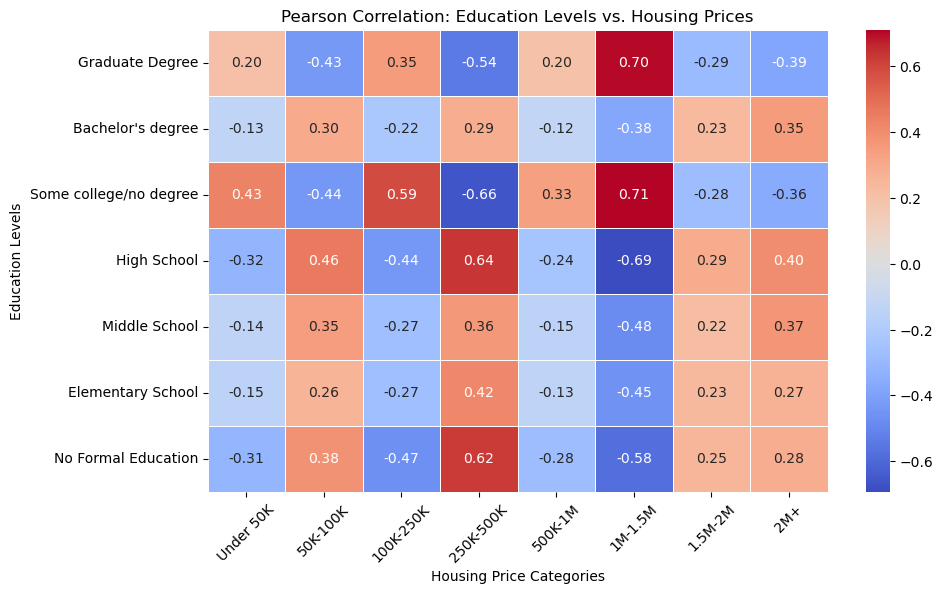

In [51]:
#Ordering variables ascending.
education_levels = [  'Graduate Degree','Bachelor\'s degree','Some college/no degree', 'High School','Middle School',
    'Elementary School','No Formal Education']
housing_prices = ['Under 50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-1.5M', '1.5M-2M', '2M+']

#Generating a heatmap to visualize correlation
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_df["Pearson Correlation"].unstack().astype(float), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            xticklabels=housing_prices, yticklabels=education_levels)

plt.title("Pearson Correlation: Education Levels vs. Housing Prices")
plt.xlabel("Housing Price Categories")
plt.ylabel("Education Levels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

#### Observations
- Lower education levels (No Formal Education, Elementary, Middle School) are positively correlated with lower-priced homes (Under 50K - 250K).
- Higher education levels correlate positively with more expensive housing categories (500K-1M, 1M+).
- Higher education levels (High School, Some College, Bachelor's, Graduate Degree) are negatively correlated with lower-priced homes.
- The strongest negative correlations appear for high education levels vs. lower-priced homes and vice versa.

### Chi-Squared Test for Independence
To detect any dependency between education level and house price.

In [52]:
#create "education score" variable 
education_mapping = {
    "No Formal Education": 1,
    "Elementary School": 2,
    "Middle School": 3,
    "High School": 4,
    "Some college/no degree": 5,
    "Bachelor's degree": 6,
    "Graduate Degree": 7
}

# List of education and house price columns
edu_columns = list(education_mapping.keys())
house_price_columns = [
    "Under 50K", "50K-100K", "100K-250K", "250K-500K",
    "500K-1M", "1M-1.5M", "1.5M-2M", "2M+"
]

# Compute the Weighted Education Level (weighted average based on proportions)
house_edu_scaled["Weighted Education Level"] = house_edu_scaled[edu_columns].mul(
    list(education_mapping.values()), axis=1).sum(axis=1) / house_edu_scaled[edu_columns].sum(axis=1)

chi_square_results = {}

# Loop over each house price category and perform the Chi-Square test
for house_col in house_price_columns:
    if house_col in house_edu_scaled.columns:
        # Bin education levels and house price percentages into 5 categories
        edu_bins = pd.cut(house_edu_scaled["Weighted Education Level"], bins=5, labels=False)
        house_bins = pd.cut(house_edu_scaled[house_col], bins=5, labels=False)

        # Create contingency table
        contingency_table = pd.crosstab(edu_bins, house_bins)

        # Perform Chi-Square Test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Store results
        chi_square_results[house_col] = {
            "Chi-Square Statistic": chi2_stat,
            "P-Value": p_value,
            "Degrees of Freedom": dof
        }

chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient="index")

chi_square_df

,Chi-Square Statistic,P-Value,Degrees of Freedom
Under 50K,188.662248,1.533787e-31,16
50K-100K,138.323245,1.533550e-21,16
100K-250K,144.024664,1.171048e-22,16
250K-500K,564.061904,9.463157e-110,16
500K-1M,578.621775,7.791125e-113,16
1M-1.5M,240.689280,4.181549e-42,16
1.5M-2M,104.982176,4.002580e-15,16
2M+,90.758562,1.813086e-12,16


#### Observations
- Since all p-values are far below 0.05, we reject the null hypothesis that education levels and housing prices are independent.

### Kruskal-Wallis Test
To check if house price distributions differ significantly between different education groups.

In [53]:
from scipy.stats import kruskal

In [16]:
kruskal_results = {}

# Loop over each house price category and perform Kruskal-Wallis test
for house_col in house_price_columns:
    if house_col in house_edu_scaled.columns:
        # Group data by education bins
        edu_bins = pd.cut(house_edu_scaled["Weighted Education Level"], bins=5, labels=False)

        # Collect house price values grouped by education bins
        grouped_data = [house_edu_scaled.loc[edu_bins == bin_value, house_col].dropna().values 
                        for bin_value in np.unique(edu_bins.dropna())]

        # Perform Kruskal-Wallis test
        if len(grouped_data) > 1:  # Ensure there is more than one group
            h_stat, p_value = kruskal(*grouped_data)
            kruskal_results[house_col] = {"H-Statistic": h_stat, "P-Value": p_value}

# Convert results to DataFrame
kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient="index")
kruskal_df

,H-Statistic,P-Value
Under 50K,216.066426,1.316226e-45
50K-100K,103.305294,1.945184e-21
100K-250K,312.579893,2.093339e-66
250K-500K,474.889298,1.805040e-101
500K-1M,526.160914,1.470095e-112
1M-1.5M,380.004397,5.809410e-81
1.5M-2M,241.429337,4.566974e-51
2M+,98.163829,2.419225e-20


#### Observations
- Since all p-values are far below 0.05, we reject the null hypothesis, meaning that education levels significantly impact housing prices.

#### **Conclusion of Part 1:**

- Our analysis confirms a strong relationship between education levels and housing prices. Pearson correlation results show that lower education levels correspond to lower-priced homes, while higher education levels correlate positively with more expensive housing categories. The negative correlation between higher education and lower-priced homes further reinforces this pattern.

- Chi-squared tests reject the independence hypothesis, indicating a systematic link between education and housing values. Similarly, the Kruskal-Wallis test confirms that education levels significantly impact housing prices, reinforcing the importance of education as a predictor of real estate value.

#### In the Next Section: 
- To deepen our analysis, we will examine whether this relationship is strictly linear or follows a more complex trend. In the next section, we aggregate education levels and housing prices within each census tract and fit various regression models to assess the best approach for predicting housing prices. By testing polynomial regression and other modeling techniques, we aim to determine the most effective way to quantify the impact of education on real estate values. 


### **Part 2: Grouping By Census Tracts**

Taking average education score in each census tract and comparing to average house price. Since census tracts are often redrawn/split from year to year, we used census tract drawn in year 2019 for this part of the analysis to prevent redundencies.

In [54]:
# extracting data in year 2019
house_edu_2019 = house_edu_scaled[house_edu_scaled["Year"] == 2019].copy()

# Convert price range percentages into a weighted average house price per census tract
price_midpoints = {
    "Under 50K": 25000, "50K-100K": 75000, "100K-250K": 175000, "250K-500K": 375000,
    "500K-1M": 750000, "1M-1.5M": 1250000, "1.5M-2M": 1750000, "2M+": 2500000
}

# Compute weighted house price using price category proportions
house_edu_2019["Weighted House Price"] = sum(
    house_edu_2019[col] * price_midpoints[col] for col in price_midpoints.keys()
)

# Group by Census Tract and calculate the mean Weighted Education Level & Avg House Price
census_tract_avg_2019 = house_edu_2019.groupby("Census Tract").agg(
    {"Weighted Education Level": "mean", "Weighted House Price": "mean"}
).reset_index()

census_tract_avg_2019_sorted=census_tract_avg_2019.dropna().sort_values(by="Weighted Education Level", ascending=True)
census_tract_avg_2019_sorted

,Census Tract,Weighted Education Level,Weighted House Price
157,"Census Tract 96.04, Multnomah County, Oregon",3.149471,2.645596e+05
135,"Census Tract 83.01, Multnomah County, Oregon",3.500095,3.145594e+05
7,"Census Tract 103.04, Multnomah County, Oregon",3.518698,2.468678e+05
150,"Census Tract 92.02, Multnomah County, Oregon",3.636723,4.951581e+05
147,"Census Tract 91.01, Multnomah County, Oregon",3.644217,2.692047e+05
...,...,...,...
88,"Census Tract 50, Multnomah County, Oregon",6.115342,7.843469e+05
98,"Census Tract 60.01, Multnomah County, Oregon",6.122820,9.516468e+05
43,"Census Tract 26, Multnomah County, Oregon",6.195948,7.866768e+05
117,"Census Tract 70, Multnomah County, Oregon",6.213332,1.867018e+06


### Revisiting Tests for Average Education by Census Tracts

#### Pearson's Correlation


In [55]:
pearson_results_census = {}

for edu_col in ["Weighted Education Level"]:
    for house_col in ["Weighted House Price"]:
        corr, p_value = pearsonr(census_tract_avg_2019_sorted[edu_col], census_tract_avg_2019_sorted[house_col])
        pearson_results_census[(edu_col, house_col)] = {"Pearson Correlation": corr, "P-Value": p_value}

# Convert to DataFrame
pearson_census_df = pd.DataFrame.from_dict(pearson_results_census, orient='index')
pearson_census_df

,,Pearson Correlation,P-Value
Weighted Education Level,Weighted House Price,0.602696,3.451610e-18


- This indicates a moderate to strong positive correlation between Weighted Education Level and Weighted House Price.
Higher education levels in a census tract are associated with higher average house prices.

#### Spearman's Correlation
For capturing nonlinear relationship

In [56]:
from scipy.stats import spearmanr

In [57]:
# Compute Spearman Correlation
corr, p_value = spearmanr(census_tract_avg_2019_sorted["Weighted Education Level"], 
                          census_tract_avg_2019_sorted["Weighted House Price"])

# Store results
spearman_results = pd.DataFrame({"Spearman Correlation": [corr], "P-Value": [p_value]})
spearman_results


,Spearman Correlation,P-Value
0,0.835702,1.373978e-45


We can observe a strong monotonic relationship between Weighted Education Level and Weighted House Price. Since the Spearman's Correlation is higher than the Pearson's Correlation, it might suggest that our data is nonlinear. So in the next steps we try to find out which model fits our data better.

#### Linear Regression

In [58]:
import statsmodels.api as sm

In [59]:
# Define independent and dependent variables
X = census_tract_avg_2019_sorted["Weighted Education Level"]
Y = census_tract_avg_2019_sorted["Weighted House Price"]

# Add constant for intercept in regression
X = sm.add_constant(X)

# Fit Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X).fit()

# Show regression summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Weighted House Price   R-squared:                       0.363
Model:                              OLS   Adj. R-squared:                  0.359
Method:                   Least Squares   F-statistic:                     95.84
Date:                  Thu, 06 Mar 2025   Prob (F-statistic):           3.45e-18
Time:                          23:23:08   Log-Likelihood:                -2407.9
No. Observations:                   170   AIC:                             4820.
Df Residuals:                       168   BIC:                             4826.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

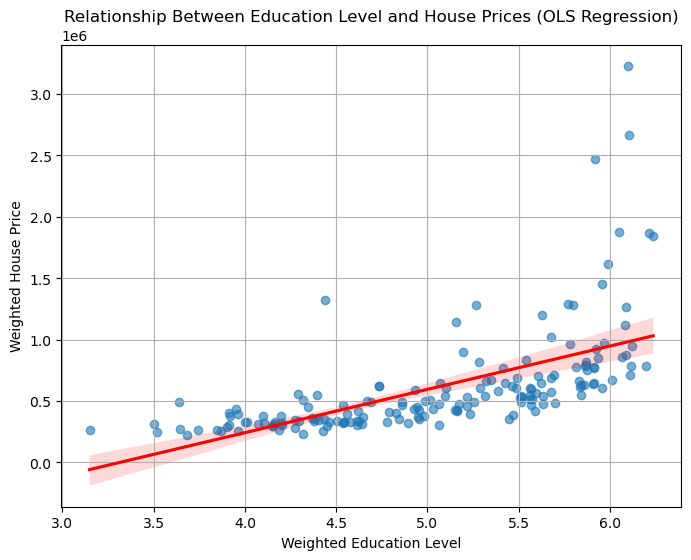

In [60]:
#Scatter plot
plt.figure(figsize=(8,6))
sns.regplot(x=census_tract_avg_2019_sorted["Weighted Education Level"], 
            y=census_tract_avg_2019_sorted["Weighted House Price"], 
            scatter_kws={"alpha":0.6}, line_kws={"color":"red"})

plt.xlabel("Weighted Education Level")
plt.ylabel("Weighted House Price")
plt.title("Relationship Between Education Level and House Prices (OLS Regression)")
plt.grid(True)
plt.show()


- Linear Regression doesn't seem suitable for our data since R-Squared = 0.363, and from the graph we see a curvature in our data.

#### Polynomial Regression
Since linear regression doesn't fit our data, we want to explore higher degree models.

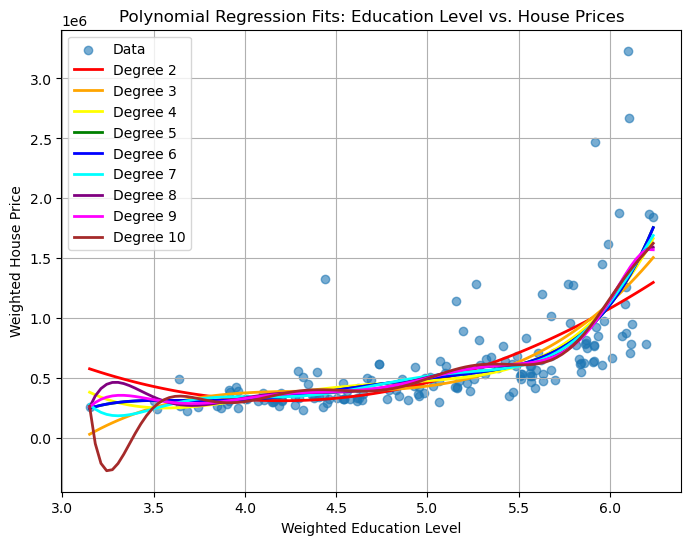

In [61]:
# Define the range of polynomial degrees to test
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(census_tract_avg_2019_sorted["Weighted Education Level"], 
            census_tract_avg_2019_sorted["Weighted House Price"], alpha=0.6, label="Data")

# Generate X values for smooth plotting
x_vals = np.linspace(census_tract_avg_2019_sorted["Weighted Education Level"].min(), 
                      census_tract_avg_2019_sorted["Weighted Education Level"].max(), 100)

# Fit and plot polynomial models
colors = ["red", "orange", "yellow", "green", "blue","cyan", "purple", "magenta", "brown"]
for i, degree in enumerate(degrees):
    poly_coeffs = np.polyfit(census_tract_avg_2019_sorted["Weighted Education Level"], 
                             census_tract_avg_2019_sorted["Weighted House Price"], degree)
    y_vals = np.polyval(poly_coeffs, x_vals)
    
    plt.plot(x_vals, y_vals, color=colors[i], linewidth=2, label=f"Degree {degree}")


plt.xlabel("Weighted Education Level")
plt.ylabel("Weighted House Price")
plt.title("Polynomial Regression Fits: Education Level vs. House Prices")
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [65]:
X = census_tract_avg_2019_sorted["Weighted Education Level"]
Y = census_tract_avg_2019_sorted["Weighted House Price"]

# Store results
poly_results = []

# Loop through polynomial degrees
for degree in degrees:
    # Generate polynomial features
    X_poly = np.column_stack([X**d for d in range(1, degree+1)])
    
    # Add constant for intercept
    X_poly = sm.add_constant(X_poly)
    
    # Fit OLS model
    model = sm.OLS(Y, X_poly).fit()
    
    # Compute metrics
    r2 = model.rsquared
    adj_r2 = model.rsquared_adj
    aic = model.aic
    bic = model.bic
    mse = mean_squared_error(Y, model.predict(X_poly))
    
    # Store results
    poly_results.append({"Degree": degree, "R-squared": r2, "Adj R-squared": adj_r2, 
                         "AIC": aic, "BIC": bic, "MSE": mse})

# Convert to DataFrame
poly_results_df = pd.DataFrame(poly_results)
poly_results_df

,Degree,R-squared,Adj R-squared,AIC,BIC,MSE
0,2,0.448142,0.441533,4797.530710,4806.938106,1.019346e+11
1,3,0.481320,0.471946,4788.990166,4801.533360,9.580632e+10
2,4,0.495429,0.483197,4786.301757,4801.980749,9.320019e+10
3,5,0.499072,0.483800,4787.069990,4805.884781,9.252733e+10
4,6,0.499072,0.480633,4789.069913,4811.020502,9.252729e+10
5,7,0.500737,0.479164,4790.503922,4815.590309,9.221975e+10
6,8,0.504372,0.479745,4791.261726,4819.483912,9.154835e+10
7,9,0.504571,0.476703,4793.193566,4824.551551,9.151165e+10
8,10,0.504524,0.476653,4793.209627,4824.567612,9.152030e+10


The polynomial regression analysis suggests a nonlinear relationship between education levels and house prices, where higher education levels correspond to increasing house prices at an accelerating rate. The best-fitting degree 8 polynomial captures this trend, showing that in census tracts with higher weighted education levels, housing prices tend to be significantly higher. 

#### **Conclusion of Part 2:**
- In this section, we examined the correlation between education levels and housing prices within census tracts, utilizing multiple statistical and regression techniques. Pearson’s correlation showed a moderate to strong positive relationship, meaning higher education levels in a census tract are generally associated with higher average house prices. The Spearman correlation was even stronger, suggesting a nonlinear relationship. Further, ordinary least squares (OLS) regression confirmed a significant positive effect, but with a modest R-squared value, indicating additional factors may influence housing prices. Polynomial regression better captured the accelerating effect of education on housing prices, with a degree-8 polynomial providing the best fit. These findings indicate that areas with higher education attainment levels tend to experience disproportionately higher home values.

#### In the Next Section:
- In the next section, we shift our focus to examining how the relationship between education and housing prices has evolved over time. By fitting time-series regression models and analyzing yearly correlations, we aim to determine whether the relationship between education and housing prices is strengthening, weakening, or remaining stable over the years. This will provide deeper insights into long-term real estate investment trends and potential predictive patterns.

### **Part 3: Trend Analysis Over Time**

Observing relationship between education and housing price over time.

<Figure size 1200x600 with 0 Axes>

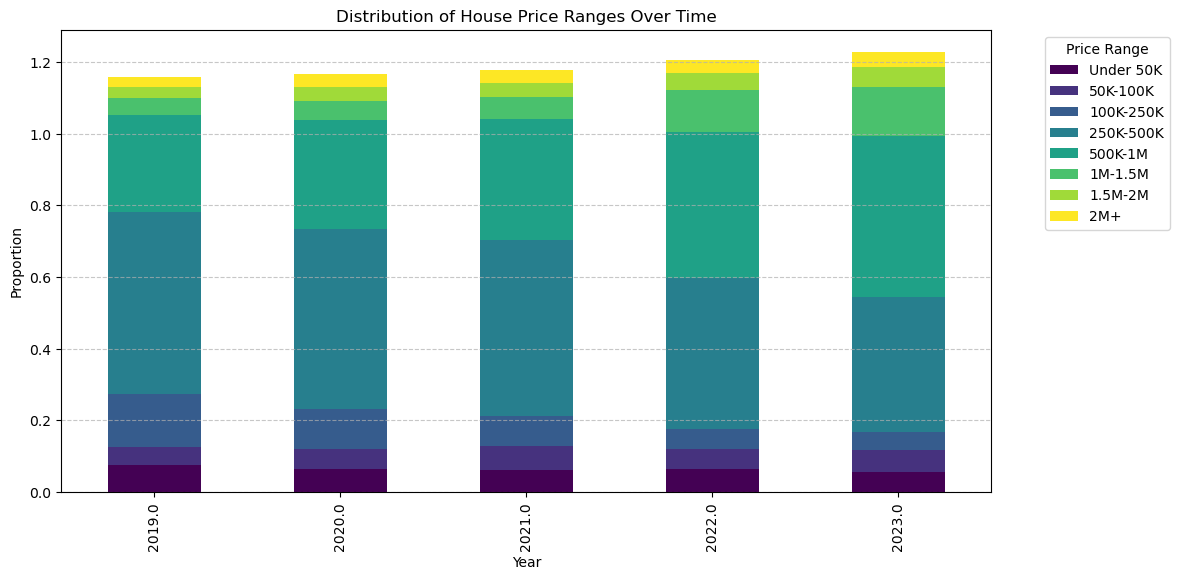

<Figure size 1200x600 with 0 Axes>

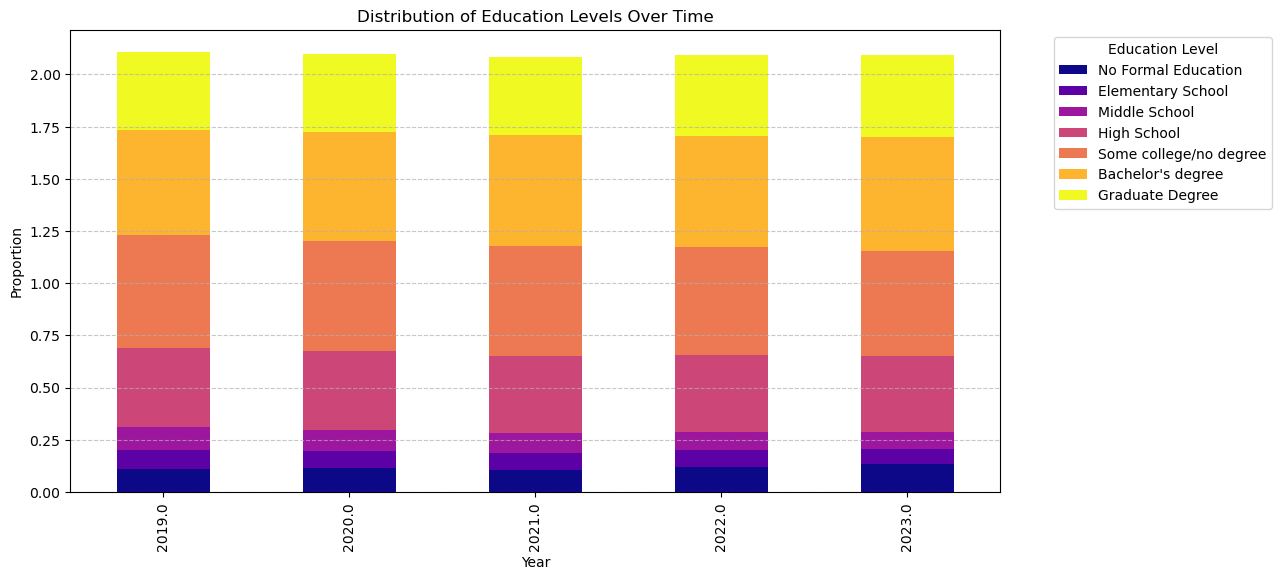

In [66]:
#Bar Plot: Distribution of House Price Ranges Over Time
plt.figure(figsize=(12,6))
house_edu_scaled.groupby("Year")[house_columns].mean().plot(kind="bar", stacked=True, colormap="viridis", figsize=(12,6))
plt.title("Distribution of House Price Ranges Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(title="Price Range", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#Bar Plot: Distribution of Education Levels Over Time
plt.figure(figsize=(12,6))
house_edu_scaled.groupby("Year")[edu_columns].mean().plot(kind="bar", stacked=True, colormap="plasma", figsize=(12,6))
plt.title("Distribution of Education Levels Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Time Series Regression

In [34]:
# Store regression results per year
house_edu_scaled["Weighted House Price"] = sum(
    house_edu_scaled[col] * price_midpoints[col] for col in price_midpoints.keys())

# Store regression results per year
time_series_results = []

# Loop through each year and fit a regression model
for year in sorted(house_edu_scaled["Year"].unique()):
    yearly_data = house_edu_scaled[house_edu_scaled["Year"] == year].copy()
    
    # Drop missing values
    yearly_data = yearly_data[["Weighted Education Level", "Weighted House Price"]].dropna()
    
    # Ensure no infinite values (if any arise from calculations)
    yearly_data = yearly_data[np.isfinite(yearly_data).all(1)]
    
    # Extract X and Y
    X = yearly_data["Weighted Education Level"]
    Y = yearly_data["Weighted House Price"]

    if len(X) > 1:  # Ensure there are enough data points to run regression
        X = sm.add_constant(X)  # Add intercept
        model = sm.OLS(Y, X).fit()  # Fit OLS regression

        # Store regression metrics
        time_series_results.append({
            "Year": year,
            "R-squared": model.rsquared,
            "Adj R-squared": model.rsquared_adj,
            "P-Value": model.pvalues[1],  # P-value for education variable
            "Coefficient": model.params[1]  # Effect size of education on home price
        })

# Convert results to DataFrame
time_series_results_df = pd.DataFrame(time_series_results)

time_series_results_df


,Year,R-squared,Adj R-squared,P-Value,Coefficient
0,2019.0,0.363242,0.359452,3.451610e-18,352954.160970
1,2020.0,0.278502,0.274783,1.898021e-15,386893.132668
2,2021.0,0.279149,0.275433,1.738031e-15,401224.527710
3,2022.0,0.308256,0.304691,3.040015e-17,476852.989970
4,2023.0,0.290676,0.287020,3.568028e-16,506194.169485


Plotting Change in Coefficient Over Time and R-Squared Over Time

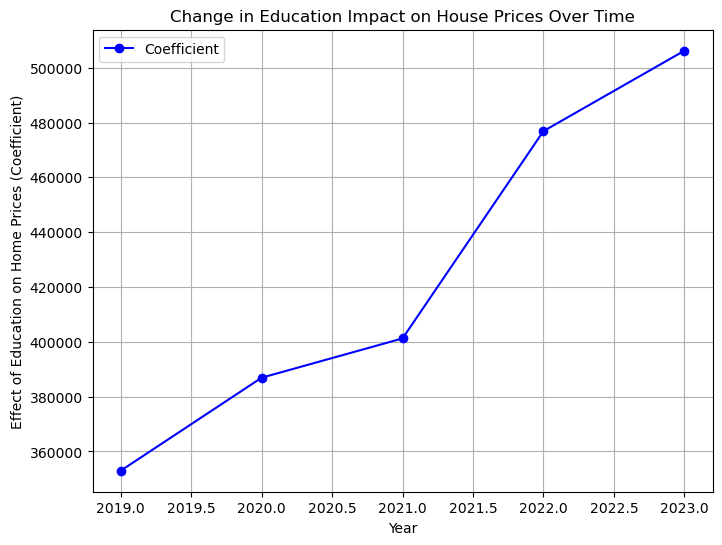

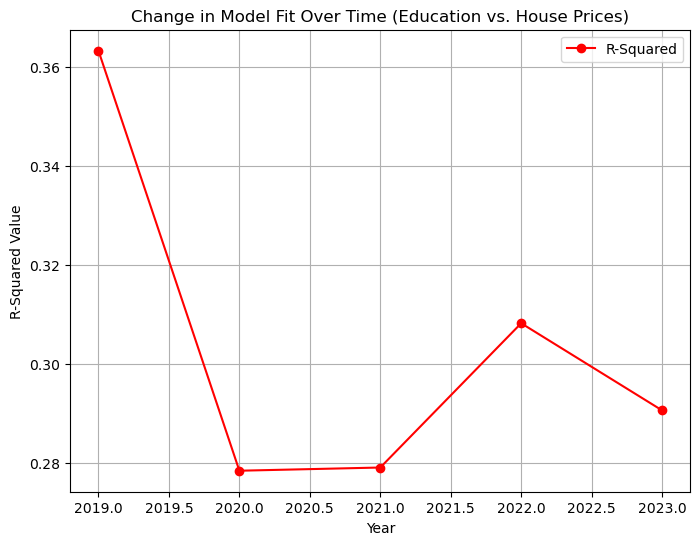

In [67]:
# Extract values for plotting
years = time_series_results_df["Year"]
coefficients = time_series_results_df["Coefficient"]
r_squared = time_series_results_df["R-squared"]

# === 1. Plot Change in Coefficient Over Time ===
plt.figure(figsize=(8,6))
plt.plot(years, coefficients, marker="o", linestyle="-", color="blue", label="Coefficient")
plt.xlabel("Year")
plt.ylabel("Effect of Education on Home Prices (Coefficient)")
plt.title("Change in Education Impact on House Prices Over Time")
plt.grid(True)
plt.legend()
plt.show()

# === 2. Plot R-Squared Over Time ===
plt.figure(figsize=(8,6))
plt.plot(years, r_squared, marker="o", linestyle="-", color="red", label="R-Squared")
plt.xlabel("Year")
plt.ylabel("R-Squared Value")
plt.title("Change in Model Fit Over Time (Education vs. House Prices)")
plt.grid(True)
plt.legend()
plt.show()


#### **Observations and Conclusions for Part 3:**

1. Increasing Coefficient 

The coefficient for Weighted Education Level increases from ~353K in 2019 to ~506K in 2023, meaning that each additional unit of education level is associated with a higher increase in house prices over time.
This suggests that education level has become a stronger determinant of home prices in recent years.

2. Fluctuating R² (Model Fit)

The R² value starts at 0.36 in 2019, drops in 2020-2021, and then increases again in 2022-2023.
While education explains a notable portion of home price variations, other economic factors (e.g., inflation, mortgage rates, demand shifts) may have influenced housing prices differently over the years.

3. Significant P-Values (All < 0.0001)

The p-values are consistently very low (< 10⁻¹⁵), meaning the relationship is statistically significant every year.
Education level remains a robust predictor of housing prices over time.

- ##### Based on our analysis, investing in areas with higher education levels appears to be a strong strategy for real estate investment. Our findings show that census tracts with higher weighted education levels tend to have significantly higher home prices, and this relationship has strengthened over time. Additionally, polynomial regression suggests that home prices accelerate in higher-education areas, making them attractive for long-term appreciation. Given these insights, a promising geographic market for investment would be high-growth urban and suburban areas with strong education metrics—such as regions near top universities or areas with increasing levels of college-educated residents. These markets not only exhibit higher property values but also indicate resilience and potential for long-term gains. By targeting these areas, a REIT can maximize returns while mitigating risks associated with stagnating or declining markets.